# Anomaly Detection

## Import required modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
from pyramid.arima import auto_arima

## Task 1: Familiarization Task

In [3]:
data = pd.read_csv("dataset/BATADAL_dataset03.csv", index_col="DATETIME")
data.index = pd.to_datetime(data.index)
data

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-06-01 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-06-01 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-06-01 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-06-01 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-06-01 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0
2014-06-01 05:00:00,0.791114,2.773177,5.155802,3.937262,3.191528,5.322743,3.988906,94.135468,1,94.153748,...,76.848953,31.443146,67.832695,30.366247,64.369881,30.366247,60.329407,33.749393,32.849392,0
2014-06-01 06:00:00,1.186589,3.536068,4.983953,3.018011,2.859591,5.066728,2.977463,95.258003,1,95.276611,...,75.703812,29.219223,87.435600,30.004425,63.333805,30.004425,58.606335,31.808870,30.908869,0
2014-06-01 07:00:00,1.420449,3.872926,4.747458,3.581882,2.359944,5.152646,2.953742,96.947456,1,96.966560,...,73.617569,29.160114,86.829086,26.536455,62.231846,26.414701,68.808609,31.700340,30.800341,0
2014-06-01 08:00:00,1.534827,4.138434,4.417932,3.959265,1.748313,5.395835,3.228596,96.970291,1,96.989403,...,74.182251,29.420120,89.644714,26.605623,60.656143,26.484545,69.221718,31.939442,31.039440,0


In [4]:
data.columns

Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5',
       'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9',
       'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

We can see that there are several kinds of signal readings provided in the SCADA data. The description of each signal is provided in https://batadal.net/images/rules.pdf. Basically the types of signal are:

* L_T1 - L_T7: depicts the water level of Tank 1 to 7
* F_PU1 - F_PU11: depicts the flow through Pump 1 - Pump 11
* S_PU1 - S_PU11: depicts the status of Pump 1 - Pump 11 with value 0 (OFF) or 1 (ON)
* F_V2: depicts the flow through Valve 2
* S_V2: depicts the status of Valve 2 with value 0 (CLOSED) or 1 (OPEN)
* P_JXXX: depicts the suction and discharge pressure of a pumping station which the junction is located

In [5]:
start_time = 0 # the start time
time_span = 160 # how much time to plot

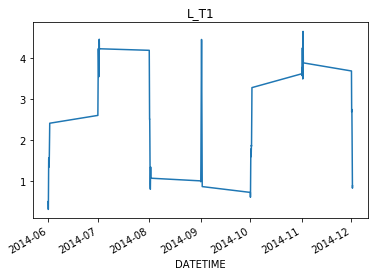

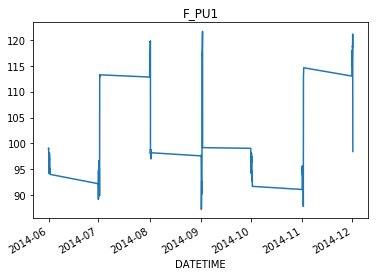

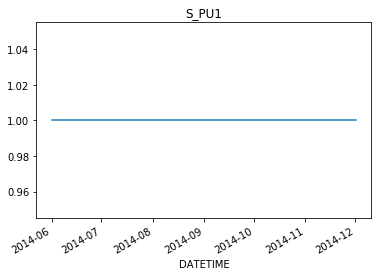

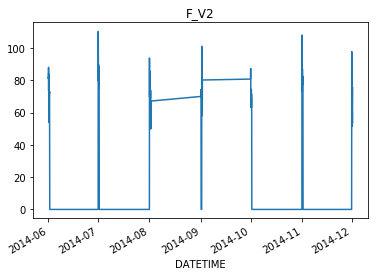

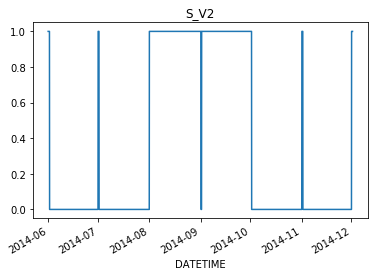

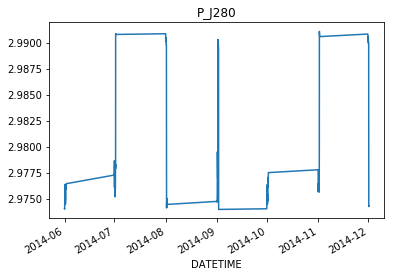

In [6]:
for signal in ["L_T1", "F_PU1", "S_PU1", "F_V2", "S_V2", "P_J280"]:
    plt.figure()
    data[signal][start_time:start_time+time_span].plot()
    plt.title(signal)

### Correlation

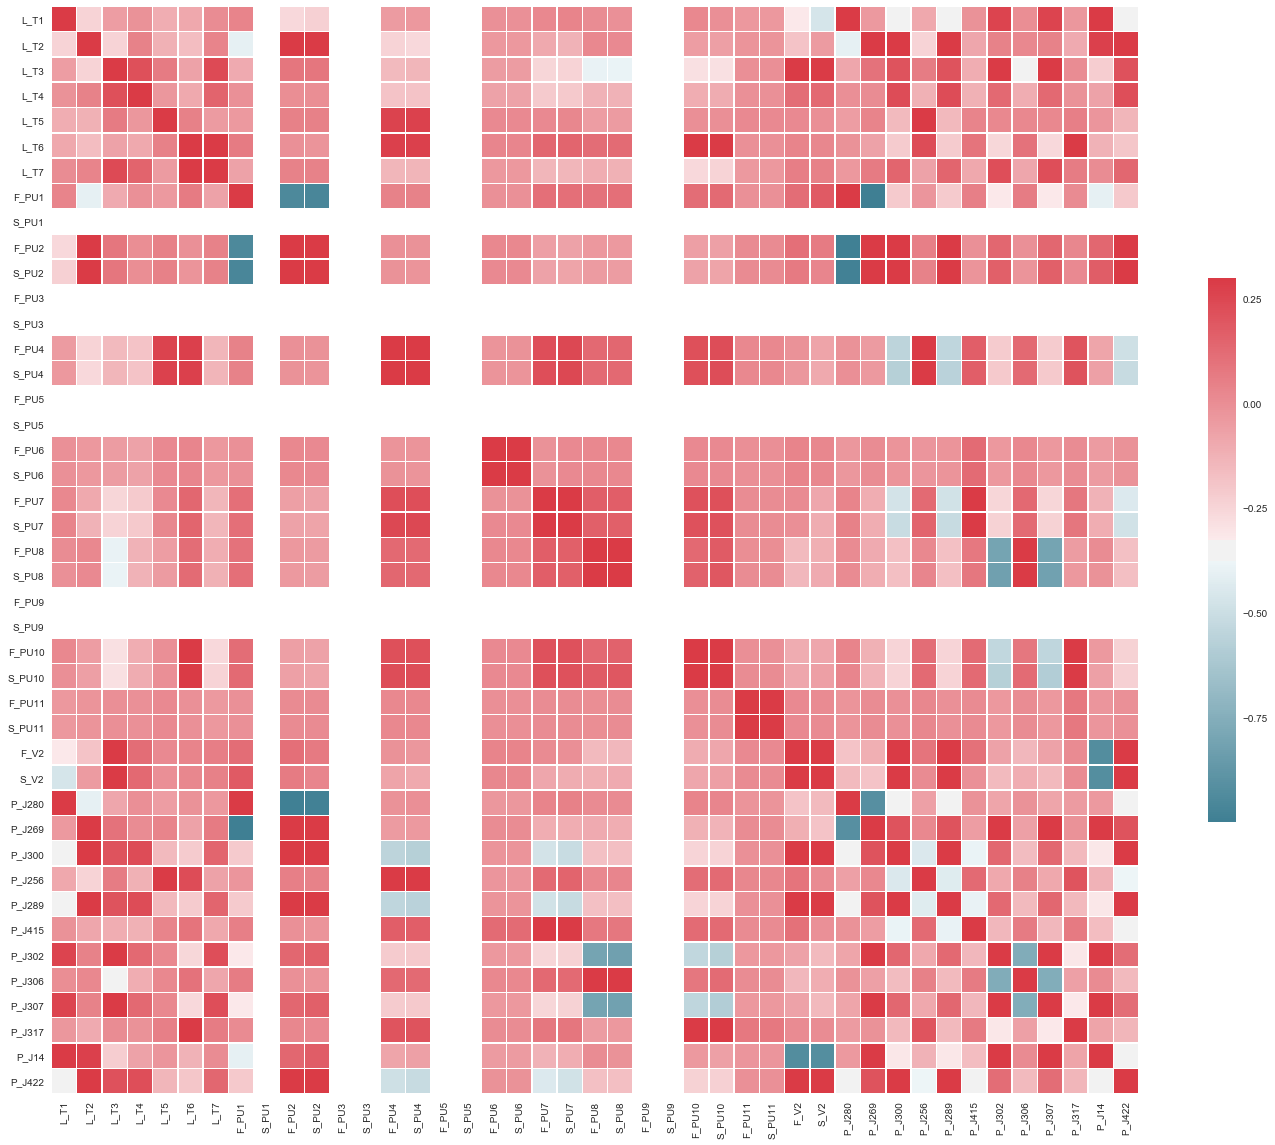

In [7]:
temp = data.drop("ATT_FLAG",axis=1,inplace=False)

sns.set(style="white")
# Compute the correlation matrix
corr = temp.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.heatmap(corr, cmap=cmap, vmax=0.3,
            square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)

### Prediction Model using Autoregression

#### Autocorrelation plot

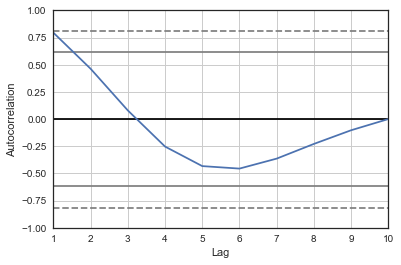

In [8]:
autocorrelation_plot(data['L_T1'][:10])

Lag: 37
Coefficients: [ 4.28791538e-01  1.71433160e+00 -9.30773460e-01  2.67341076e-01
 -7.14957657e-02 -1.02241316e-01  3.33309274e-02 -4.50823472e-02
  8.75216892e-05  9.29861388e-02 -4.41530823e-02  2.49594128e-02
 -5.53992100e-03 -7.19882517e-02 -4.72564474e-02  7.56041309e-02
  8.43370057e-03  1.07379747e-02 -5.04435942e-02  7.00790522e-03
  1.01333927e-02 -3.45236499e-02  1.03691217e-01  1.13538254e-03
  1.16663433e-02 -8.64861508e-02 -1.85555396e-02 -4.50382295e-02
  3.95669070e-02  1.26009175e-02  3.90865436e-02  1.78719887e-02
 -2.77130893e-02 -3.66664831e-02  3.48586185e-03  4.70029237e-02
  3.75131407e-02 -7.12803451e-02]
predicted=1.073243, expected=0.869968
predicted=0.684354, expected=0.663842
predicted=0.599365, expected=1.031355
predicted=0.822821, expected=1.591397
predicted=1.265122, expected=2.480027
predicted=1.811987, expected=3.203121
predicted=2.353368, expected=3.657291
predicted=2.839373, expected=4.082142
predicted=3.226049, expected=4.450097
predicted=3.48889

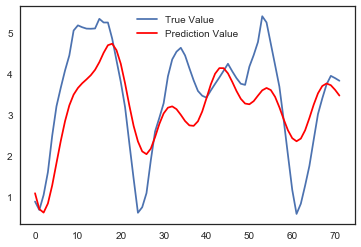

In [9]:
# split dataset
series = data['L_T2']
X = series.values
train, test = X[1:len(X)-72], X[len(X)-72:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test, label="True Value")
plt.plot(predictions, color='red',label="Prediction Value")
plt.legend()
plt.show()

## Task 2: ARMA Task

/usr/local/lib/python3.6/site-packages/pandas/plotting/_misc.py:629: RuntimeWarning: invalid value encountered in double_scalars
  (data[h:] - mean)).sum() / float(n) / c0
/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


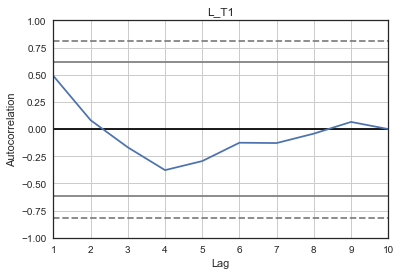

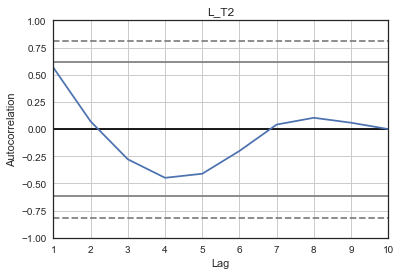

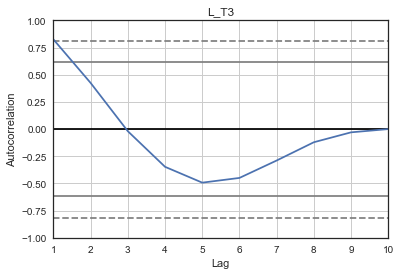

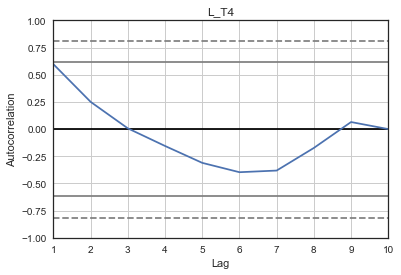

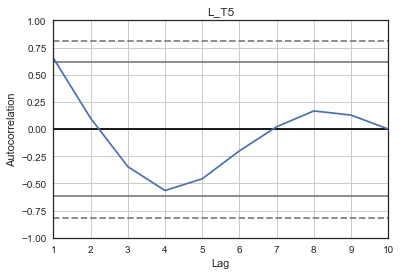

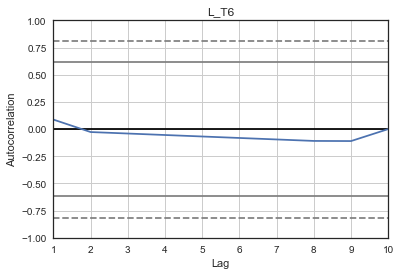

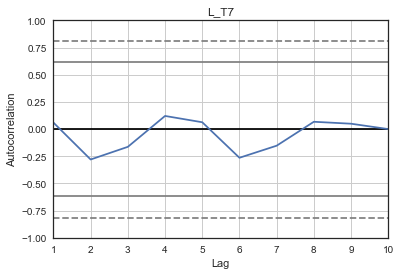

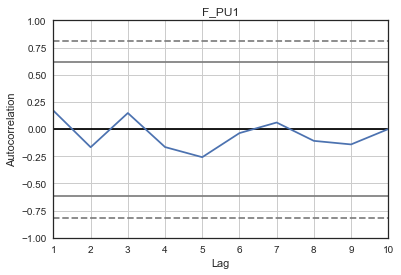

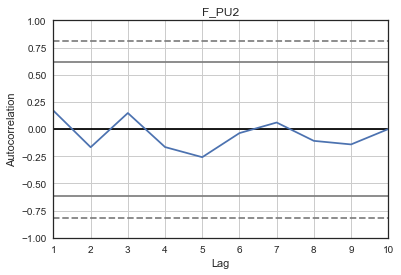

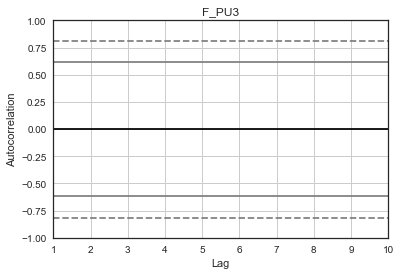

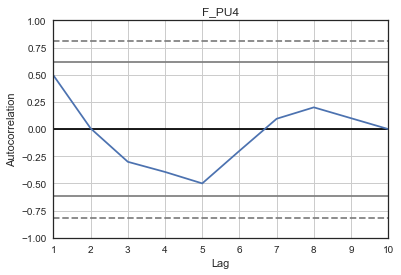

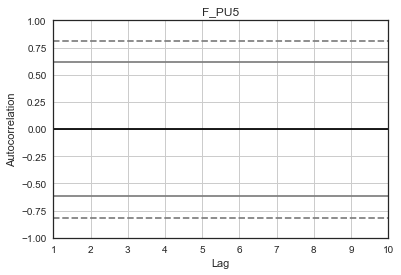

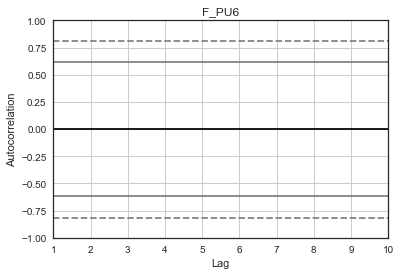

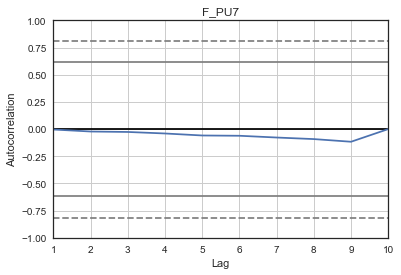

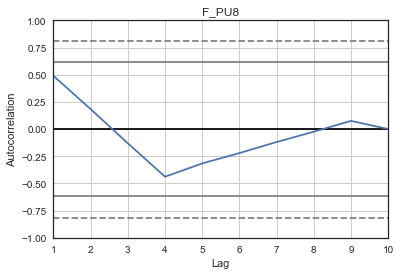

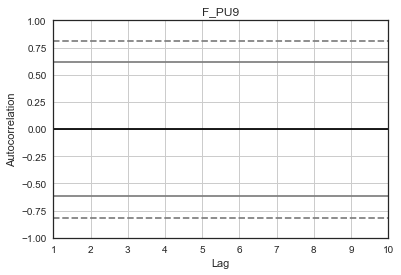

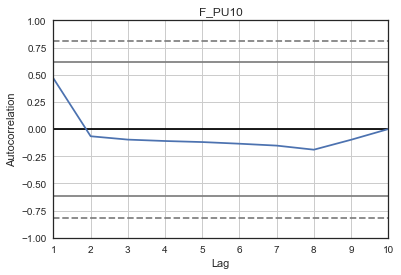

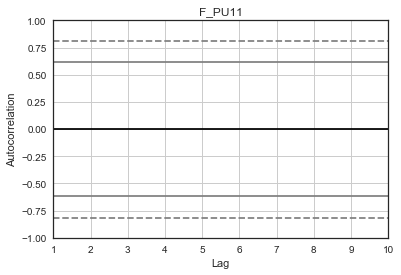

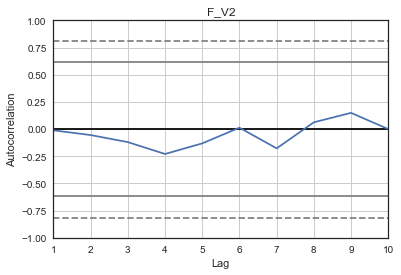

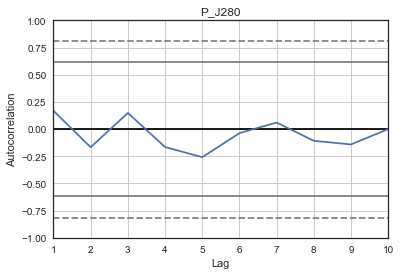

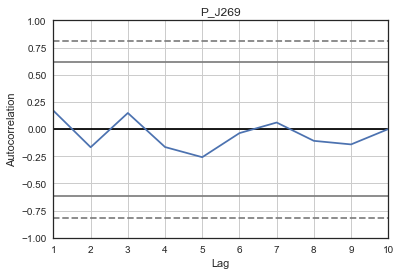

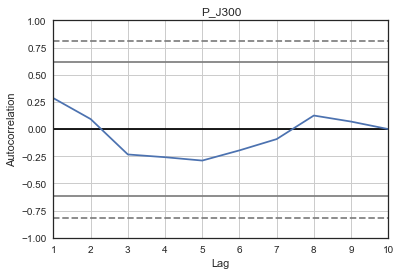

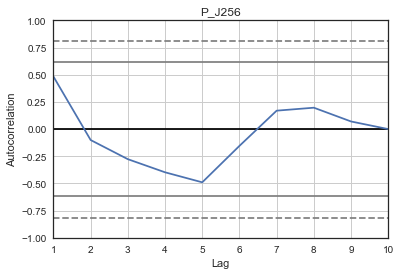

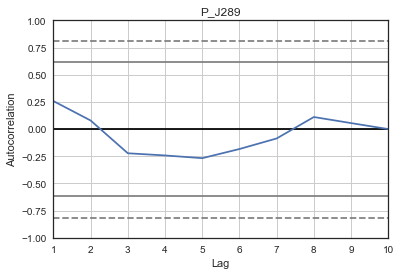

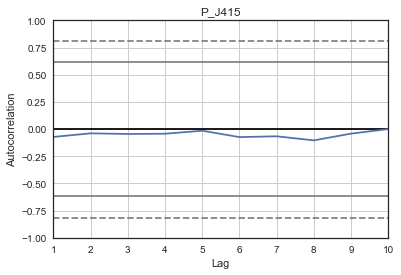

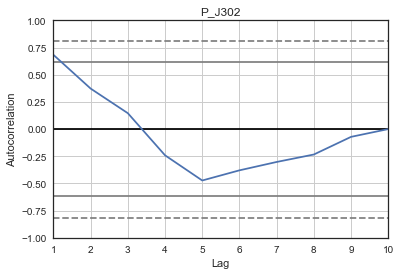

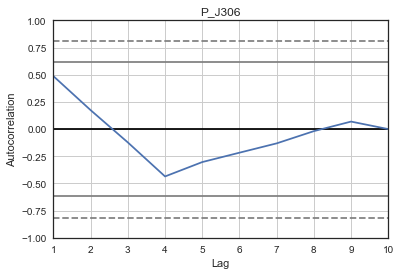

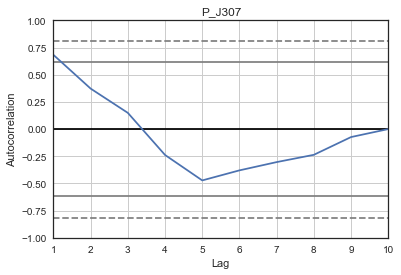

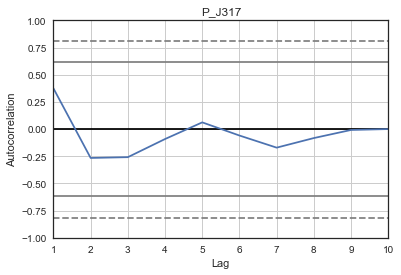

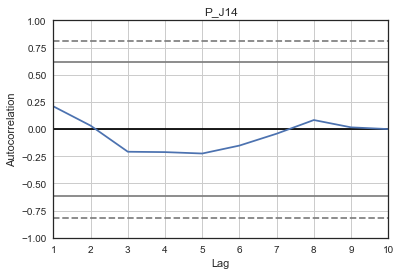

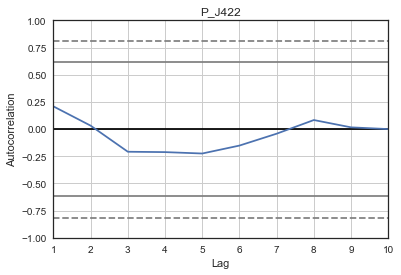

In [15]:
# list the sensors column
sensors = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'F_PU2', 'F_PU3', 'F_PU4', 'F_PU5', 'F_PU6', 'F_PU7', 'F_PU8', 'F_PU9', 'F_PU10', 'F_PU11', 'F_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']

# autocorrelation for each sensor
for sensor in sensors:
    plt.figure()
    autocorrelation_plot(data[sensor][10:20])
    plt.title(sensor)


We can see from the autocorrelation plot, that a good starting lag number (for the order of AR) would be either 1, 2, or 3. We will use the auto_arima function to grid-search the best parameter for p and q using AIC as the criterion. Let's try it first on `L_T1`. Note that we use d=1 (differencing order) to make sure that the series is stationary and speeds up the grid search.

In [12]:
stepwise_model = auto_arima(data['L_T1'], start_p=1, start_q=1,
                           max_p=3, max_q=3, seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1); AIC=-12444.850, BIC=-12416.538, Fit time=3.187 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-479.663, BIC=-465.507, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-11899.701, BIC=-11878.467, Fit time=0.081 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-7644.120, BIC=-7622.886, Fit time=2.055 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-13031.922, BIC=-12996.532, Fit time=16.103 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-12472.275, BIC=-12443.963, Fit time=0.258 seconds
Fit ARIMA: order=(2, 1, 2); AIC=-13260.030, BIC=-13217.562, Fit time=14.848 seconds
Fit ARIMA: order=(3, 1, 3); AIC=-13278.545, BIC=-13221.921, Fit time=24.475 seconds
Fit ARIMA: order=(2, 1, 3); AIC=-13260.110, BIC=-13210.565, Fit time=16.614 seconds
Fit ARIMA: order=(3, 1, 2); AIC=-13271.288, BIC=-13221.742, Fit time=20.284 seconds
Total fit time: 97.928 seconds


In [13]:
stepwise_model

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 3),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

Okay, so we found the model with smalles AIC number with p=3 and q=3. Now let's find out for other sensors.

In [16]:
models = {}
# try build a model for each sensor
for sensor in sensors:
    print(sensor)
    stepwise_model = auto_arima(data[sensor], start_p=1, start_q=1,
                           max_p=3, max_q=3, seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    print(stepwise_model)
    models[sensor] = stepwise_model

L_T1
Fit ARIMA: order=(1, 1, 1); AIC=-12444.850, BIC=-12416.538, Fit time=2.379 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-479.663, BIC=-465.507, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-11899.701, BIC=-11878.467, Fit time=0.078 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-7644.120, BIC=-7622.886, Fit time=0.484 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-13031.922, BIC=-12996.532, Fit time=15.818 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-12472.275, BIC=-12443.963, Fit time=0.239 seconds
Fit ARIMA: order=(2, 1, 2); AIC=-13260.030, BIC=-13217.562, Fit time=14.995 seconds
Fit ARIMA: order=(3, 1, 3); AIC=-13278.545, BIC=-13221.921, Fit time=22.314 seconds
Fit ARIMA: order=(2, 1, 3); AIC=-13260.110, BIC=-13210.565, Fit time=15.921 seconds
Fit ARIMA: order=(3, 1, 2); AIC=-13271.288, BIC=-13221.742, Fit time=18.544 seconds
Total fit time: 90.793 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 3),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seas

Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=76416.351, BIC=76430.507, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=76418.337, BIC=76439.571, Fit time=0.033 seconds
Fit ARIMA: order=(0, 1, 1); AIC=76418.337, BIC=76439.571, Fit time=0.032 seconds
Total fit time: 1.948 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')
F_PU3
Fit ARIMA: order=(0, 0, 0); AIC=nan, BIC=nan, Fit time=0.012 seconds
Total fit time: 0.025 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 0, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')
F_PU4


/usr/local/lib/python3.6/site-packages/pyramid/arima/auto.py:381: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: divide by zero encountered in log
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)


Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=71304.045, BIC=71318.201, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=71305.748, BIC=71326.982, Fit time=0.082 seconds
Fit ARIMA: order=(0, 1, 1); AIC=71305.745, BIC=71326.979, Fit time=0.039 seconds
Total fit time: 1.944 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')
F_PU5
Fit ARIMA: order=(0, 0, 0); AIC=nan, BIC=nan, Fit time=0.005 seconds
Total fit time: 0.006 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 0, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')
F_PU6


/usr/local/lib/python3.6/site-packages/pyramid/arima/auto.py:381: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: divide by zero encountered in log
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)


Fit ARIMA: order=(1, 1, 1); AIC=29402.207, BIC=29430.519, Fit time=6.073 seconds
Fit ARIMA: order=(0, 1, 0); AIC=31549.808, BIC=31563.964, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=31551.808, BIC=31573.041, Fit time=0.033 seconds
Fit ARIMA: order=(0, 1, 1); AIC=31551.806, BIC=31573.040, Fit time=0.040 seconds
Fit ARIMA: order=(2, 1, 1); AIC=28689.160, BIC=28724.549, Fit time=4.434 seconds
Fit ARIMA: order=(2, 1, 0); AIC=30381.154, BIC=30409.466, Fit time=0.054 seconds
Fit ARIMA: order=(2, 1, 2); AIC=28597.850, BIC=28640.318, Fit time=5.886 seconds
Fit ARIMA: order=(3, 1, 3); AIC=28599.669, BIC=28656.293, Fit time=8.254 seconds
Fit ARIMA: order=(1, 1, 2); AIC=28623.993, BIC=28659.383, Fit time=9.572 seconds
Fit ARIMA: order=(3, 1, 2); AIC=28596.407, BIC=28645.952, Fit time=6.574 seconds
Fit ARIMA: order=(3, 1, 1); AIC=28598.232, BIC=28640.699, Fit time=24.385 seconds
Total fit time: 65.317 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 2),
   out

/usr/local/lib/python3.6/site-packages/pyramid/arima/auto.py:381: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: divide by zero encountered in log
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)


Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=71396.919, BIC=71411.074, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=71148.555, BIC=71169.788, Fit time=0.029 seconds
Fit ARIMA: order=(0, 1, 1); AIC=68528.214, BIC=68549.448, Fit time=3.851 seconds
Fit ARIMA: order=(0, 1, 2); AIC=67227.007, BIC=67255.319, Fit time=8.998 seconds
Fit ARIMA: order=(1, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 18.266 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')
F_PU11
Fit ARIMA: order=(1, 1, 1); AIC=9565.775, BIC=9594.087, Fit time=12.557 seconds
Fit ARIMA: order=(0, 1, 0); AIC=12103.379, BIC=

Fit ARIMA: order=(0, 1, 1); AIC=60182.855, BIC=60204.088, Fit time=4.218 seconds
Fit ARIMA: order=(0, 1, 2); AIC=60124.111, BIC=60152.423, Fit time=8.772 seconds
Fit ARIMA: order=(1, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 18.416 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')
P_J302
Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=47971.566, BIC=47985.722, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=47962.866, BIC=47984.100, Fit time=0.039 seconds
Fit ARIMA: order=(0, 1, 1); AIC=47960.998, BIC=47982.232, Fit time=0.034 seconds
Fit ARIMA: order=(0, 1, 2); AIC=47859.123, BIC

In [18]:
models['F_PU1']

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')